In [1]:
!pip install pickle5

     |████████████████████████████████| 133kB 8.5MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219258 sha256=dee2bdd19f232bc9ac2a96568829e0f417001d2e9fdb2b4aa839c328b41d79ec
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:
import pandas as pd
import numpy as np
import pickle5 as pickle
import itertools

#Data that I parsed. Analysys and cleaning are needed.

In [3]:
with open('stories_pandas_df.pkl', 'rb') as file:
  df = pickle.load(file)
df

,name,author,categories,body/story,likesNumber,commentsNumber,timestamp of scraping,url
0,No Hard Feelings,A.dot Ram,"Drama, Science Fiction, Speculative","Dear Winston,\nBy the time you’re reading this...",251,131,2020-11-16T13:51:25.961554,https://blog.reedsy.com/creative-writing-promp...
1,3:00 A.M.,Alby Carter,"Contemporary, Drama, Lesbian","It’s late, and my head still hurts from the fi...",140,65,2020-11-16T13:51:26.814869,https://blog.reedsy.com/creative-writing-prom...
2,The Population,Julia Boddie,"Fiction, Science Fiction, Kids",They rushed him to the hospital. Timothy laid ...,83,31,2020-11-16T13:51:27.692685,https://blog.reedsy.com/creative-writing-prom...
3,That Night,Eliza Ane,"Thriller, Suspense",The door slammed against the wall as she threw...,82,79,2020-11-16T13:51:28.563709,https://blog.reedsy.com/creative-writing-prom...
4,A savior?,B. W.,"Adventure, Fantasy",This has something to do with the novel that i...,72,260,2020-11-16T13:51:29.870689,https://blog.reedsy.com/creative-writing-prom...
...,...,...,...,...,...,...,...,...
4140,A Different Kind Of Ophalim,Azalea Young,"Fantasy, Fiction",Of Important Note:\nWith the creation of Yalib...,0,0,2021-02-03T23:41:12.424204,https://blog.reedsy.com/creative-writing-prom...
4141,The Miracle Maker,Reija Sillanpaa,"Fiction, Sad","TW: sexual abuse, familial abuse\n\nMy super-s...",0,0,2021-02-03T23:41:13.191278,https://blog.reedsy.com/creative-writing-prom...
4142,She Listens,Da. Blackmore,Sad,Tears.\nShe steps into the schoolyard silently...,0,0,2021-02-03T23:41:13.949157,https://blog.reedsy.com/creative-writing-prom...
4143,"Someone given a second chance, is someone give...",Nokwazi Mokoena,"Coming of Age, Fiction, Inspirational",I cannot recall what was happening in my head ...,0,0,2021-02-03T23:41:14.786111,https://blog.reedsy.com/creative-writing-prom...


#We have to clean the data. If a sample has no category at all -- we remove the sample from the dataset.

In [4]:
df.replace('', np.nan, regex=True, inplace=True)
df = df.dropna(subset=['categories']).reset_index(drop=True)

df.replace('', np.nan, regex=True, inplace=True)
df = df.dropna(subset=['body/story']).reset_index(drop=True)

df

,name,author,categories,body/story,likesNumber,commentsNumber,timestamp of scraping,url
0,No Hard Feelings,A.dot Ram,"Drama, Science Fiction, Speculative","Dear Winston,\nBy the time you’re reading this...",251,131,2020-11-16T13:51:25.961554,https://blog.reedsy.com/creative-writing-promp...
1,3:00 A.M.,Alby Carter,"Contemporary, Drama, Lesbian","It’s late, and my head still hurts from the fi...",140,65,2020-11-16T13:51:26.814869,https://blog.reedsy.com/creative-writing-prom...
2,The Population,Julia Boddie,"Fiction, Science Fiction, Kids",They rushed him to the hospital. Timothy laid ...,83,31,2020-11-16T13:51:27.692685,https://blog.reedsy.com/creative-writing-prom...
3,That Night,Eliza Ane,"Thriller, Suspense",The door slammed against the wall as she threw...,82,79,2020-11-16T13:51:28.563709,https://blog.reedsy.com/creative-writing-prom...
4,A savior?,B. W.,"Adventure, Fantasy",This has something to do with the novel that i...,72,260,2020-11-16T13:51:29.870689,https://blog.reedsy.com/creative-writing-prom...
...,...,...,...,...,...,...,...,...
3579,A Different Kind Of Ophalim,Azalea Young,"Fantasy, Fiction",Of Important Note:\nWith the creation of Yalib...,0,0,2021-02-03T23:41:12.424204,https://blog.reedsy.com/creative-writing-prom...
3580,The Miracle Maker,Reija Sillanpaa,"Fiction, Sad","TW: sexual abuse, familial abuse\n\nMy super-s...",0,0,2021-02-03T23:41:13.191278,https://blog.reedsy.com/creative-writing-prom...
3581,She Listens,Da. Blackmore,Sad,Tears.\nShe steps into the schoolyard silently...,0,0,2021-02-03T23:41:13.949157,https://blog.reedsy.com/creative-writing-prom...
3582,"Someone given a second chance, is someone give...",Nokwazi Mokoena,"Coming of Age, Fiction, Inspirational",I cannot recall what was happening in my head ...,0,0,2021-02-03T23:41:14.786111,https://blog.reedsy.com/creative-writing-prom...


In [5]:
df["author"].value_counts()

Zilla Babbitt     14
Writer Maniac     14
Sara Blanch       12
Joe Swanson       12
Deborah Mercer    10
                  ..
Dan Bilinski       1
Sabrina Rose       1
Joanna Ortega      1
Nea H.             1
Kate Heesemann     1
Name: author, Length: 2446, dtype: int64

#We have categories as a string "cat1, cat2, cat3" and we need to replace it with a list [cat1, cat2, cat3].

In [6]:
df["categories"] = df["categories"].apply(lambda x: x.split(", "))
df

,name,author,categories,body/story,likesNumber,commentsNumber,timestamp of scraping,url
0,No Hard Feelings,A.dot Ram,"[Drama, Science Fiction, Speculative]","Dear Winston,\nBy the time you’re reading this...",251,131,2020-11-16T13:51:25.961554,https://blog.reedsy.com/creative-writing-promp...
1,3:00 A.M.,Alby Carter,"[Contemporary, Drama, Lesbian]","It’s late, and my head still hurts from the fi...",140,65,2020-11-16T13:51:26.814869,https://blog.reedsy.com/creative-writing-prom...
2,The Population,Julia Boddie,"[Fiction, Science Fiction, Kids]",They rushed him to the hospital. Timothy laid ...,83,31,2020-11-16T13:51:27.692685,https://blog.reedsy.com/creative-writing-prom...
3,That Night,Eliza Ane,"[Thriller, Suspense]",The door slammed against the wall as she threw...,82,79,2020-11-16T13:51:28.563709,https://blog.reedsy.com/creative-writing-prom...
4,A savior?,B. W.,"[Adventure, Fantasy]",This has something to do with the novel that i...,72,260,2020-11-16T13:51:29.870689,https://blog.reedsy.com/creative-writing-prom...
...,...,...,...,...,...,...,...,...
3579,A Different Kind Of Ophalim,Azalea Young,"[Fantasy, Fiction]",Of Important Note:\nWith the creation of Yalib...,0,0,2021-02-03T23:41:12.424204,https://blog.reedsy.com/creative-writing-prom...
3580,The Miracle Maker,Reija Sillanpaa,"[Fiction, Sad]","TW: sexual abuse, familial abuse\n\nMy super-s...",0,0,2021-02-03T23:41:13.191278,https://blog.reedsy.com/creative-writing-prom...
3581,She Listens,Da. Blackmore,[Sad],Tears.\nShe steps into the schoolyard silently...,0,0,2021-02-03T23:41:13.949157,https://blog.reedsy.com/creative-writing-prom...
3582,"Someone given a second chance, is someone give...",Nokwazi Mokoena,"[Coming of Age, Fiction, Inspirational]",I cannot recall what was happening in my head ...,0,0,2021-02-03T23:41:14.786111,https://blog.reedsy.com/creative-writing-prom...


#To analyze the categories existing in the dataset.

In [7]:
categories = itertools.chain(*df["categories"].tolist())
categories_df = pd.DataFrame(categories, columns=["category"])
categories_df.value_counts()

category           
Fiction                1195
Drama                   790
Fantasy                 522
Romance                 492
Mystery                 462
Sad                     417
Suspense                370
Contemporary            336
Funny                   313
Adventure               309
Thriller                309
Christmas               306
Science Fiction         306
Inspirational           268
Friendship              259
Holiday                 247
Crime                   210
Teens & Young Adult     206
Coming of Age           185
Happy                   151
Creative Nonfiction     150
Speculative             147
American                115
Horror                  110
LGBTQ+                   72
Kids                     69
Historical Fiction       67
Christian                54
High School              46
Bedtime                  44
Urban Fantasy            41
African American         36
Gay                      32
Black                    25
Lesbian                  24


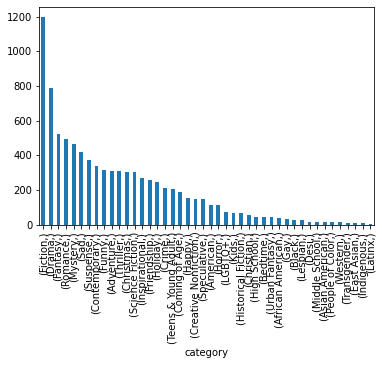

In [8]:
categories_df.value_counts().plot(kind='bar')

#As our classes are highly imbalanced we remove categories that are represented by less than 100 samples, i.e. consider them being irregular and irrelative as a noise.

In [9]:
list_of_categories = categories_df["category"].to_list()

counts = dict()
for i in list_of_categories:
  counts[i] = counts.get(i, 0) + 1

print(sorted(counts.items(), key=lambda item: item[1], reverse=True)[:10])

categories_to_drop = {k: v for k, v in counts.items() if v < 100}
categories_to_drop = set(categories_to_drop)
print(categories_to_drop)

[('Fiction', 1195), ('Drama', 790), ('Fantasy', 522), ('Romance', 492), ('Mystery', 462), ('Sad', 417), ('Suspense', 370), ('Contemporary', 336), ('Funny', 313), ('Thriller', 309)]
{'Middle School', 'Black', 'Bedtime', 'Indigenous', 'Latinx', 'Desi', 'Kids', 'Western', 'Lesbian', 'LGBTQ+', 'High School', 'Christian', 'Gay', 'African American', 'East Asian', 'Transgender', 'Asian American', 'People of Color', 'Urban Fantasy', 'Historical Fiction'}


Removal from the main dataframe itself.

In [10]:
def remove_redundant_categories(cats):
  return [cat for cat in cats if cat not in categories_to_drop]

df["categories"] = df["categories"].apply(lambda cats: remove_redundant_categories(cats))
df[260:261]

,name,author,categories,body/story,likesNumber,commentsNumber,timestamp of scraping,url
260,Destiny,Anjali Roy,[],"Raghav, the go-getting young man in her hobby ...",10,1,2020-11-16T13:55:01.505172,https://blog.reedsy.com/creative-writing-prom...


#Remove a sample if it has no categories at all after the last step.

In [11]:
df = df[df['categories'].map(lambda d: len(d)) > 0].reset_index(drop=True)
df

,name,author,categories,body/story,likesNumber,commentsNumber,timestamp of scraping,url
0,No Hard Feelings,A.dot Ram,"[Drama, Science Fiction, Speculative]","Dear Winston,\nBy the time you’re reading this...",251,131,2020-11-16T13:51:25.961554,https://blog.reedsy.com/creative-writing-promp...
1,3:00 A.M.,Alby Carter,"[Contemporary, Drama]","It’s late, and my head still hurts from the fi...",140,65,2020-11-16T13:51:26.814869,https://blog.reedsy.com/creative-writing-prom...
2,The Population,Julia Boddie,"[Fiction, Science Fiction]",They rushed him to the hospital. Timothy laid ...,83,31,2020-11-16T13:51:27.692685,https://blog.reedsy.com/creative-writing-prom...
3,That Night,Eliza Ane,"[Thriller, Suspense]",The door slammed against the wall as she threw...,82,79,2020-11-16T13:51:28.563709,https://blog.reedsy.com/creative-writing-prom...
4,A savior?,B. W.,"[Adventure, Fantasy]",This has something to do with the novel that i...,72,260,2020-11-16T13:51:29.870689,https://blog.reedsy.com/creative-writing-prom...
...,...,...,...,...,...,...,...,...
3549,A Different Kind Of Ophalim,Azalea Young,"[Fantasy, Fiction]",Of Important Note:\nWith the creation of Yalib...,0,0,2021-02-03T23:41:12.424204,https://blog.reedsy.com/creative-writing-prom...
3550,The Miracle Maker,Reija Sillanpaa,"[Fiction, Sad]","TW: sexual abuse, familial abuse\n\nMy super-s...",0,0,2021-02-03T23:41:13.191278,https://blog.reedsy.com/creative-writing-prom...
3551,She Listens,Da. Blackmore,[Sad],Tears.\nShe steps into the schoolyard silently...,0,0,2021-02-03T23:41:13.949157,https://blog.reedsy.com/creative-writing-prom...
3552,"Someone given a second chance, is someone give...",Nokwazi Mokoena,"[Coming of Age, Fiction, Inspirational]",I cannot recall what was happening in my head ...,0,0,2021-02-03T23:41:14.786111,https://blog.reedsy.com/creative-writing-prom...


#Repeat plotting to compare what we've done so far.

In [12]:
categories = itertools.chain(*df["categories"].tolist())
categories_df = pd.DataFrame(categories, columns=["category"])
categories_df.value_counts()

category           
Fiction                1195
Drama                   790
Fantasy                 522
Romance                 492
Mystery                 462
Sad                     417
Suspense                370
Contemporary            336
Funny                   313
Thriller                309
Adventure               309
Science Fiction         306
Christmas               306
Inspirational           268
Friendship              259
Holiday                 247
Crime                   210
Teens & Young Adult     206
Coming of Age           185
Happy                   151
Creative Nonfiction     150
Speculative             147
American                115
Horror                  110
dtype: int64

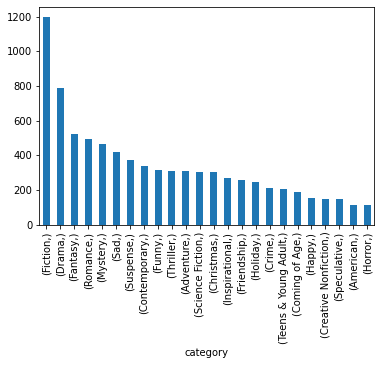

In [13]:
categories_df.value_counts().plot(kind='bar')

#Make all possible categories in the dataset as one-hot encoding.

In [14]:
category_names = categories_df['category'].unique().tolist()
print("Quantity of categories:")
print(category_names)
print(len(category_names))
categories = pd.get_dummies(category_names)
categories.head(10)

Quantity of categories:
['Drama', 'Science Fiction', 'Speculative', 'Contemporary', 'Fiction', 'Thriller', 'Suspense', 'Adventure', 'Fantasy', 'Coming of Age', 'Crime', 'Mystery', 'Funny', 'Sad', 'Horror', 'Romance', 'Friendship', 'Inspirational', 'American', 'Teens & Young Adult', 'Holiday', 'Happy', 'Creative Nonfiction', 'Christmas']
24


,Adventure,American,Christmas,Coming of Age,Contemporary,Creative Nonfiction,Crime,Drama,Fantasy,Fiction,Friendship,Funny,Happy,Holiday,Horror,Inspirational,Mystery,Romance,Sad,Science Fiction,Speculative,Suspense,Teens & Young Adult,Thriller
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#A function that allows us to make vector encoding in the categories above. And a simple example.

In [15]:
def encode_categories_into_vector(categs):
  one_hot_vectors = [categories[x] for x in categs]
  y_onehot = list(map(sum, zip(*one_hot_vectors)))

  return y_onehot

print(df.loc[10]['categories'])
encode_categories_into_vector(df.loc[10]['categories'])

['Mystery', 'Suspense', 'Thriller']


[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#Make this one-hot encoding for all rows in the dataframe.

In [16]:
df["categories"] = df["categories"].apply(lambda x: encode_categories_into_vector(x))
df['categories'].head()

0    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...
Name: categories, dtype: object

In [17]:
df.to_pickle("./cleaned_dataset_df.pkl")